In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [10]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Data Preprocessing Explanation

- **Dropped Columns:**  
  - We drop high-cardinality or less informative columns like `Name` and `Ticket`. These have too many unique values, which makes them hard to encode meaningfully without introducing noise.
  - The `Cabin` column has too many missing values and is not useful without complex imputation.
  - These columns typically don’t help model performance unless you're using NLP or advanced feature engineering.

- **Missing Value Handling:**  
  - `Age` is filled with the **median** value.
  - `Embarked` is filled with the **most frequent (mode)** value.

- **One-Hot Encoding & Multicollinearity:**  
  - Categorical columns (`Sex`, `Embarked`) are converted into numerical form using **one-hot encoding**.
  - For example, `Embarked` has 3 possible values: `C`, `Q`, and `S`. One-hot encoding turns this into 3 columns: `Embarked_C`, `Embarked_Q`, and `Embarked_S`.
  - However, if we include all three columns, they become **perfectly dependent**. For instance, if `Embarked_C = 0` and `Embarked_Q = 0`, then `Embarked_S` must be `1`.  
    This introduces **multicollinearity**, where one feature can be perfectly predicted by others.
  - Some algorithms (especially **linear/logistic regression**) assume input features are independent. So, we use `drop_first=True` in `pd.get_dummies()` to drop one of the dummy columns and avoid this issue.

In [19]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


### 🌲 Understanding Random Forest

**Random Forest** is a powerful and widely-used ensemble learning algorithm. It's suitable for both **classification** and **regression** problems. It works by combining the outputs of many individual decision trees to make more accurate and stable predictions.

---

#### 🔍 How It Works

1. **Bootstrap Sampling**:
   - Random Forest creates multiple random subsets of the training data (with replacement).
   - Each subset is used to train a separate decision tree. This adds diversity among the trees.

2. **Random Feature Selection**:
   - When a tree is growing, it doesn’t consider all the features at each split.
   - Instead, it picks a random subset of features — which reduces similarity between trees and prevents overfitting.

3. **Ensemble Voting** (Majority Rule):
   - In **classification**, each tree makes a prediction (like "survived" or "not survived").
   - The **final prediction** is based on the **majority vote** — whichever label gets the most votes across all trees is chosen.
     - Example: 100 trees → 60 say "Survived", 40 say "Not Survived" → Output is "Survived".
   - In **regression**, instead of voting, the final prediction is the **average** of all tree outputs.

---

#### ⚙️ Parameters Explained

model = RandomForestClassifier(n_estimators=100, random_state=42)


### ⚙️ Random Forest Parameters and Benefits Explained

#### 🔢 `n_estimators=100`:
- This means the model creates **100 decision trees**.
- More trees usually improve model stability and performance but increase training time.
- **100** is a good default — it balances accuracy and speed.

#### 🧪 `random_state=42`:
- Sets a **seed** for reproducibility.
- Without it, your results may vary slightly on each run.
- **42** is just a popular arbitrary choice; any integer works.

#### 🌲 `max_depth` Not Specified:
- Allows trees to grow **fully** unless other stopping rules are met (like pure leaves).
- Deeper trees can capture complex patterns — helpful for small/medium datasets like Titanic.
- For large datasets, limiting depth (e.g., `max_depth=10`) can prevent **overfitting** and reduce **training time**.

---

### ✅ Why Use Random Forest?

- **Robust to Overfitting**: Combines many trees to generalize better than a single decision tree.
- **Handles Missing or Unscaled Data**: Doesn’t require feature scaling and tolerates missing values.
- **Gives Feature Importance**: Helps you understand which features matter most in prediction.
- **Performs Well with Minimal Tuning**: Often strong results even with default settings.
- **Handles Mixed Data Types**: Works with both numerical and categorical features.

---

💡 **Overall**, Random Forest is a reliable and interpretable first-choice algorithm when working on a new dataset.


In [28]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### ✅ Model Evaluation Summary

#### ✔️ Accuracy
**Accuracy: 82.1%**  
The model correctly predicted survival outcomes **82.1%** of the time on the test set.

---

#### 🧮 Confusion Matrix
Actual 0 → 91 | 14
Actual 1 → 18 | 56

- **TN (91)**: Correctly predicted **not survived**
- **FP (14)**: Predicted **survived**, but actually **not survived**
- **FN (18)**: Predicted **not survived**, but actually **survived**
- **TP (56)**: Correctly predicted **survived**

---

#### 📊 Classification Report
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Not Survived) | 0.83 | 0.87 | 0.85 | 105 |
| 1 (Survived)     | 0.80 | 0.76 | 0.78 | 74 |

**Definitions:**
- **Precision**: When the model predicts a class (e.g., survived), how often is it correct?  
  > *High precision = few false positives*

- **Recall**: Out of all actual instances of a class, how many did the model correctly find?  
  > *High recall = few false negatives*

- **F1-Score**: The balance between precision and recall.  
  > *Good overall performance = high F1-score*

---

These metrics help us understand not just how often the model is right, but *how* it's right (e.g., is it better at finding survivors or non-survivors?).


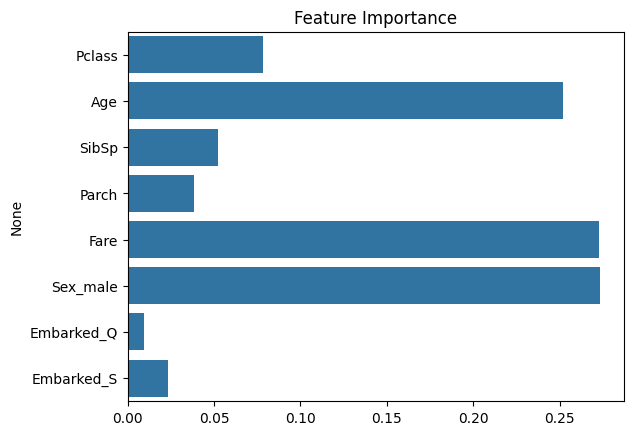

In [25]:
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()